In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Excel file
file_path =r"C:\Users\User\Desktop\graduation project 2\E-commerce_data.xlsx"
xls = pd.ExcelFile(file_path)


In [3]:
customers = xls.parse("customers")
genders = xls.parse("genders")
cities = xls.parse("cities")
transactions = xls.parse("transactions")
branches = xls.parse("branches")
merchants = xls.parse("merchants")

In [4]:
df_customers = customers.merge(genders, on="gender_id").merge(cities, on="city_id")
df_transactions = transactions.merge(df_customers, on="customer_id")


Text(0, 0.5, '')

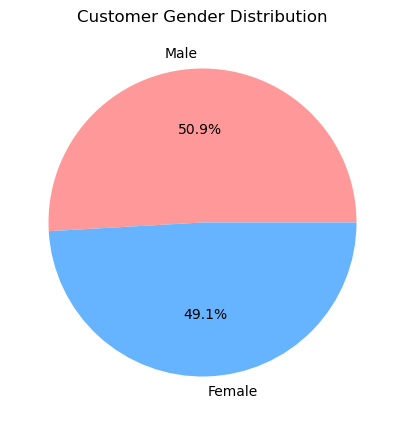

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_customers["gender_name"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
plt.title("Customer Gender Distribution")
plt.ylabel("")

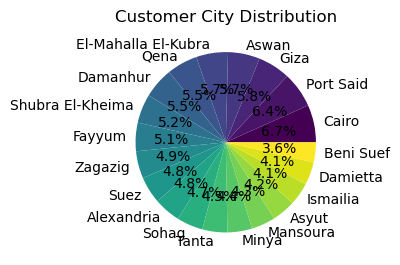

In [6]:
plt.subplot(1, 2, 2)
df_customers["city_name"].value_counts().plot.pie(autopct="%1.1f%%", cmap="viridis")
plt.title("Customer City Distribution")
plt.ylabel("")
plt.show()


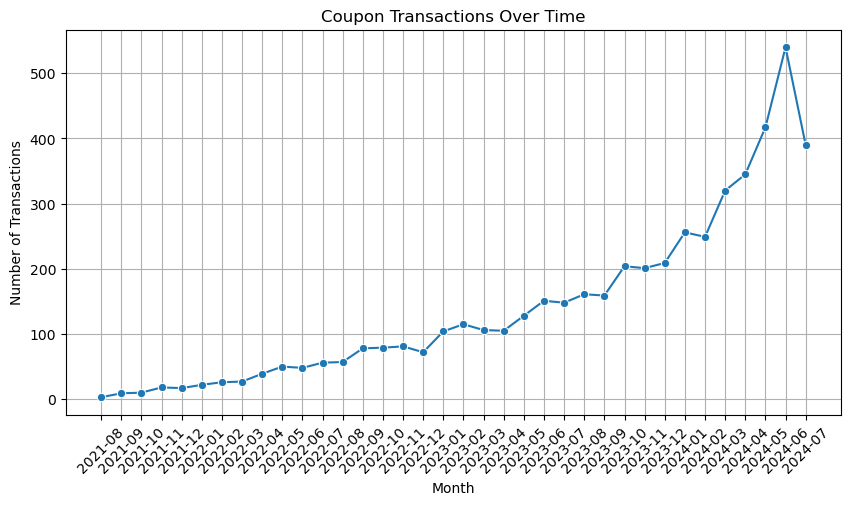

In [7]:
df_transactions["transaction_date"] = pd.to_datetime(df_transactions["transaction_date"])
time_series = df_transactions.groupby(df_transactions["transaction_date"].dt.to_period("M")).size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=time_series.index.astype(str), y=time_series.values, marker="o")
plt.xticks(rotation=45)
plt.title("Coupon Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13924\1513259117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")


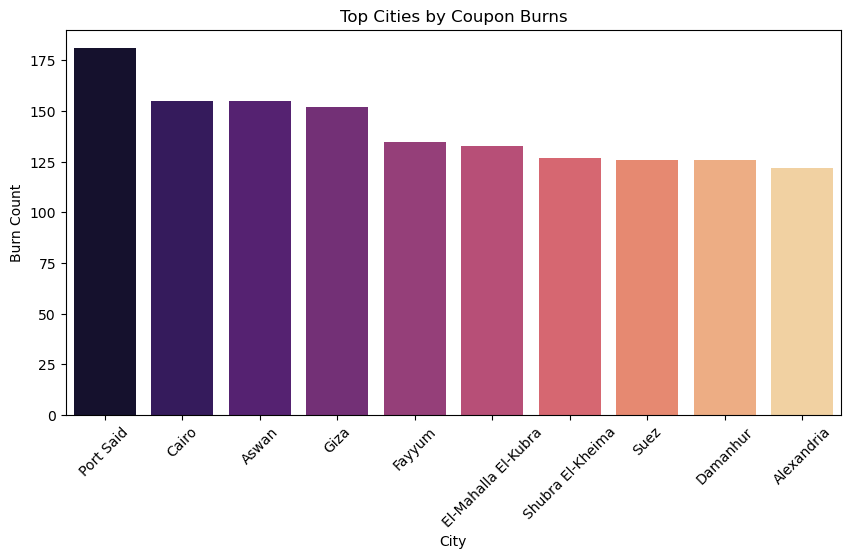

In [8]:
df_burned = df_transactions[df_transactions["transaction_status"] == "burned"]
top_cities = df_burned["city_name"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top Cities by Coupon Burns")
plt.xlabel("City")
plt.ylabel("Burn Count")
plt.show()

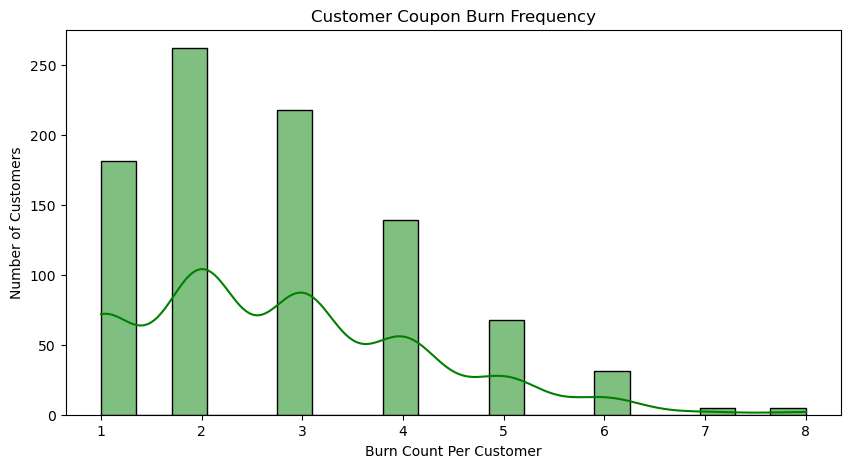

In [9]:
burn_frequency = df_burned["customer_id"].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(burn_frequency, bins=20, kde=True, color="green")
plt.title("Customer Coupon Burn Frequency")
plt.xlabel("Burn Count Per Customer")
plt.ylabel("Number of Customers")
plt.show()